# Project notebook

- Easy access to all the experimental data generated in the lab
- All the results from statistical analysis
- Visualization of reports
- All the the python functionality at hand

## Library import

In [1]:
from report_manager import project, analysisResult
from plotly.offline import init_notebook_mode, iplot
import missingno as msno
import warnings

warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)
%matplotlib inline

Using TensorFlow backend.


## Creating a Project object

- Connects to the database
- Extracts all the project information depending on the data types: Cinical, Proteomics, Whole-exome sequencing, etc.
- Runs all the default analyses
- Returns all datasets and analyses results, and plots

In [2]:
p = project.Project('P0000002', datasets=None, report={})

pca
anova
6.0
correlation
data exploration interaction
enrichment


## Visualizing the Project report

In [3]:
plots = p.show_report("notebook")

## Access to datasets

### Clinical data

In [4]:
clin_dataset = p.get_dataset('clinical').get_dataset('dataset')
clin_dataset.head()

biological_sample                            clinical_variable    group  \
0              BS30             Alkaline phosphatase measurement  Healthy   
1              BS30  Biological sex (property) (qualifier value)  Healthy   
2              BS30                    Triglycerides measurement  Healthy   
3              BS30                   Hemoglobin A1c measurement  Healthy   
4              BS30                              Bilirubin level  Healthy   

  subject        value  
0     S30        54.00  
1     S30  10052007.00  
2     S30         0.58  
3     S30         6.30  
4     S30        15.00

#### Further dataset manipulation and visualization

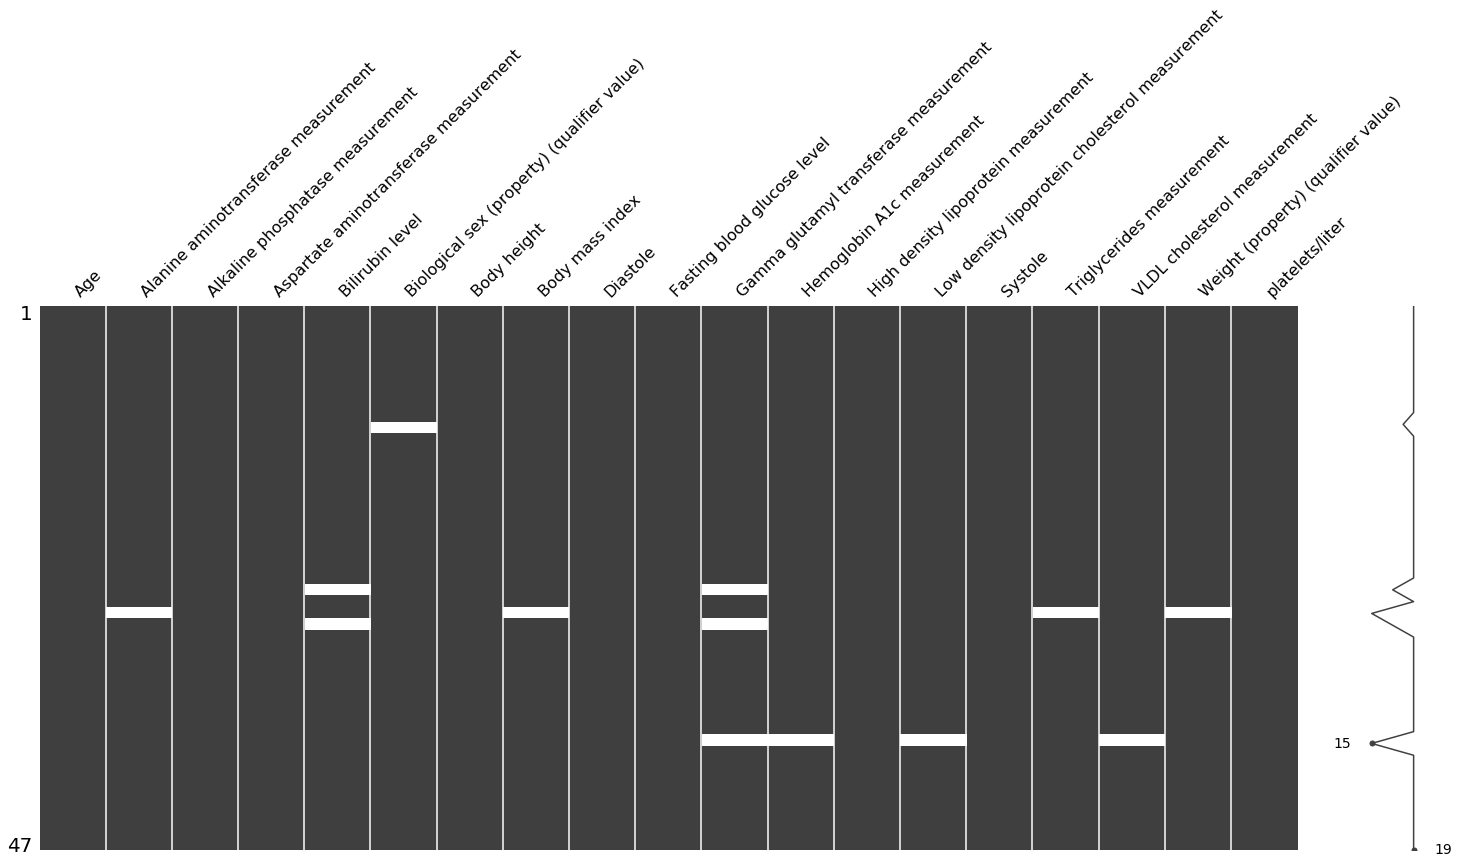

In [5]:
clin_dataset = clin_dataset.drop(['group'], axis=1).pivot_table(index='subject', columns='clinical_variable', values='value', aggfunc='first')
msno.matrix(clin_dataset)

### Proteomics dataset (original)

In [6]:
dataset = p.get_dataset("proteomics").get_dataset("dataset")

In [7]:
dataset.head()

LFQ_intensity      group identifier     name sample
0       7.837847  Cirrhosis     S6BGE9            AS76
1       6.839910  Cirrhosis     Q9Y5C1  ANGPTL3   AS76
2       8.392257  Cirrhosis     Q9UL90            AS76
3       8.309295  Cirrhosis     Q9UL89            AS76
4       7.904283  Cirrhosis     S6B294            AS76

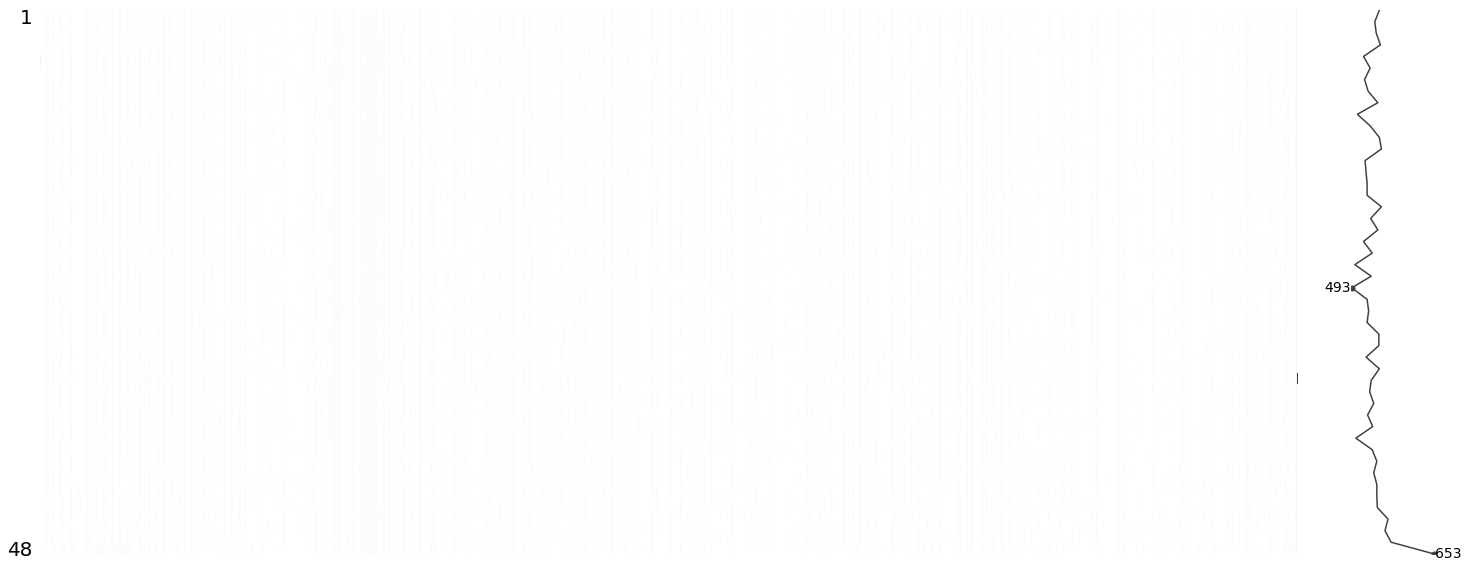

In [8]:
dataset = dataset.drop(['group'], axis=1).pivot_table(index='sample', columns='identifier', values='LFQ_intensity', aggfunc='first')
msno.matrix(dataset)

In [9]:
preprocessed_dataset = p.get_dataset('proteomics').get_dataset('preprocessed')
preprocessed_dataset[['group','O60341-KDM1A']]

identifier    group  O60341-KDM1A
0            CANCER      8.634195
1            CANCER      8.745473
2           CONTROL      7.193311
3           CONTROL      7.545418

### Proteomics dataset (imputed)

In [4]:
reg_dataset = p.get_dataset("proteomics").get_dataset("regulation_table")
reg_dataset.loc[reg_dataset['identifier'] == 'O60341-KDM1A',:]

identifier  group1   group2   logFC   lower  upper  rejected  \
356  O60341-KDM1A  CANCER  CONTROL -1.3205 -2.1149 -0.526     False   

            FC  t-statistics    pvalue  -Log pvalue      padj  \
356 -20.917029      51.14718  0.018996     1.721336  0.200885   

            correction  
356  FDR correction BH

In [37]:
result = analysisResult.AnalysisResult("Mapper analysis", analysis_type = "mapper", 
                           args = {"n_cubes": 15,
                                   "overlap": 0.85,
                                   "n_clusters": 2,
                                   "linkage": "single",
                                  "title":"Topological data analysis - Sample stratification"}, data=reg_dataset)
mapper_plot = result.get_plot(name="mapper", identifier="mapper_plot")[0]

In [38]:
iplot(mapper_plot.figure)

## Analyses results

#### Differential regulation

In [16]:
reg_table = p.get_dataset("proteomics").get_dataset("regulation_table")
reg_table.head()

identifier     group1           group2  log2FC   lower   upper  \
3   A0A0C4DH38-IGHV5-51  Cirrhosis              T2D -0.4135 -0.6421 -0.1849   
11      A0A0U1RR20-PRG4  Cirrhosis   NAFLD with NGT  0.3043  0.1117  0.4969   
12      A0A0U1RR20-PRG4  Cirrhosis  NAFLD with T2DM  0.2794  0.0868  0.4720   
21          A0A120HG46-  Cirrhosis   NAFLD with NGT -0.2759 -0.4435 -0.1082   
22          A0A120HG46-  Cirrhosis  NAFLD with T2DM -0.1912 -0.3589 -0.0236   

    rejected  t-statistics    pvalue  -Log pvalue      padj  
3       True      6.692432  0.000280     3.553162  0.010000  
11      True      6.372451  0.000405     3.392064  0.016923  
12      True      6.372451  0.000405     3.392064  0.016923  
21      True      7.174110  0.000162     3.791113  0.016667  
22      True      7.174110  0.000162     3.791113  0.016667